# <img src="ups.png">

### Nombre: Fanny Gutama
### Docente: Ing. Diego Quisi

## Prueba Chi-Cuadrada.

Realice un programa que permita calcular el valor de Chi-Cuadrada y genere la gráfica de distribución de los 100 primeros números pseudo-aleatorios generados por los métodos de cuadrados medios y productos medios.

Emplee el siguiente nivel de significancia α=0.05

Las semillas para generar los números son las siguientes:

 * Cuadrados medios: Xo=74731897457, D=7
 * Congruencia lineal: a=74731897457, b=37747318974, Xo=7, M=19


In [1]:
import pandas as pd, math
import matplotlib.pyplot as pp
import numpy as np

# Cuadrados medios

In [16]:
iteraciones =100
semilla =74731897457
digitos =7
val_xn=[]
val_xn_m=[]
val_ui=[]
val_rn=[]
div=[int(str(num).ljust(digitos+1, "0")) for num in [1]]
ui=""
izq=int(digitos/2)
der=digitos-izq

In [19]:
for i in range(iteraciones):
    if(len(str(semilla))>=3):
        if(len(str(semilla*semilla))>digitos):
            val_xn.append(semilla)
            val_xn_m.append(semilla*semilla)
            numero = str(semilla*semilla)
            mitad=math.floor(len(numero)/2)
            if(int(numero)>0):
                for p in range(mitad-izq, mitad+der, 1): ui+=numero[p]
            val_ui.append(ui)
            val_rn.append(int(ui)/div[0])  
            semilla=int(val_ui[-1])
            ui=''
        else:
            print('El numero de digito ecede el tamañano solicitado')
            break
    else:
        print('La semilla debe ser mayor a 0 y debe tener mas de 3 dígitos')
        break
        
tabla=pd.DataFrame({"Xn":val_xn, "(Xn*XN)": val_xn_m,"UI":val_ui,"RN":val_rn})
tabla


,Xn,(Xn*XN),UI,RN
0,74731897457,5584856497523563066849,9752356,0.975236
1,9752356,95108447550736,8447550,0.844755
2,8447550,71361101002500,1101002,0.110100
3,1101002,1212205404004,2205404,0.220540
4,2205404,4863806803216,3806803,0.380680
...,...,...,...,...
295,6614018,43745234104324,5234104,0.523410
296,5234104,27395844682816,5844682,0.584468
297,5844682,34160307681124,0307681,0.030768
298,307681,94667597761,6675977,0.667598


COn los datos obtenido en RN podemos sacar el Chi-Cuadrada.

In [4]:
datosrn=list(tabla.iloc[:,3])
n=len(datosrn)
m=math.sqrt(n)
cont=0
aux=0.0

intervalos=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
Oi=[]
Ei=[]
estadistico=[]
while(cont<10):
    conteo=0
    print(aux,"  entre ",intervalos[cont])
    for i in datosrn:
        if(i>aux and i<intervalos[cont]):
            conteo+=1   
    Oi.append(conteo)
    Ei.append(n/m)
    aux=intervalos[cont]
    cont+=1   
for i in range(len(Oi)):
    salida=(math.pow((Ei[i]-Oi[i]),2)/Ei[i])
    estadistico.append(salida)
suma=0
for i in estadistico:
    suma+=i;    

tablafinal=pd.DataFrame({"Intervalo":intervalos, "Ei": Ei,"Oi":Oi,"(Oi – Ei)²/Ei":estadistico})
tablafinal

0.0   entre  0.1
0.1   entre  0.2
0.2   entre  0.3
0.3   entre  0.4
0.4   entre  0.5
0.5   entre  0.6
0.6   entre  0.7
0.7   entre  0.8
0.8   entre  0.9
0.9   entre  1


,Intervalo,Ei,Oi,(Oi – Ei)²/Ei
0,0.1,10.0,10,0.0
1,0.2,10.0,17,4.9
2,0.3,10.0,14,1.6
3,0.4,10.0,7,0.9
4,0.5,10.0,11,0.1
5,0.6,10.0,11,0.1
6,0.7,10.0,6,1.6
7,0.8,10.0,6,1.6
8,0.9,10.0,8,0.4
9,1.0,10.0,10,0.0


El valor obtenido es comparado con        χ_0.05,9^2=16.9 de la tabla de probabilidades de Chi-Cuadrada, con ello la hipótesis nula de que no existe diferencia entre la distribución de la muestra y la distribución uniforme se acepta (h0 es válida).<br>
χ_obtenida^2⩽χ_0.05,9^2=3.4⩽16.9


In [5]:
if suma > 16.9:
    print(suma,"> 16.9")
else:
     print(suma,"< 16.9")

11.2 < 16.9


# Congruencia lineal

In [6]:
a=74731897457
b=37747318974
m=19
val_xn=[semilla]
val_un=['']
for i in range(iteraciones): val_xn.append((a*val_xn[-1]+b)%m) ; val_un.append(val_xn[-1]/m)
        
tabla2=pd.DataFrame({"XN ":val_xn, "UN ":val_un})
tabla2

,XN,UN
0,8749752,
1,2,0.105263
2,8,0.421053
3,15,0.789474
4,1,0.0526316
...,...,...
96,11,0.578947
97,9,0.473684
98,13,0.684211
99,5,0.263158


Con los datos obtenidos en UN podemos sacar el Chi-Cuadrada.

In [7]:
datosrn=list(tabla2.iloc[1:,1])
n=len(datosrn)
m=math.sqrt(n)
cont=0
aux=0.0

intervalos=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
Oi=[]
Ei=[]
estadistico2=[]
while(cont<10):
    conteo=0
    print(aux,"  entre ",intervalos[cont])
    for i in datosrn:
        if(i>aux and i<intervalos[cont]):
            conteo+=1   
    Oi.append(conteo)
    Ei.append(n/m)
    aux=intervalos[cont]
    cont+=1   
for i in range(len(Oi)):
    salida=(math.pow((Ei[i]-Oi[i]),2)/Ei[i])
    estadistico2.append(salida)

suma=0
for i in estadistico2:
    suma+=i;    

tablafinal2=pd.DataFrame({"Intervalo":intervalos, "Ei": Ei,"Oi":Oi,"(Oi – Ei)²/Ei":estadistico2})
tablafinal2

0.0   entre  0.1
0.1   entre  0.2
0.2   entre  0.3
0.3   entre  0.4
0.4   entre  0.5
0.5   entre  0.6
0.6   entre  0.7
0.7   entre  0.8
0.8   entre  0.9
0.9   entre  1


,Intervalo,Ei,Oi,(Oi – Ei)²/Ei
0,0.1,10.0,11,0.1
1,0.2,10.0,12,0.4
2,0.3,10.0,11,0.1
3,0.4,10.0,0,10.0
4,0.5,10.0,22,14.4
5,0.6,10.0,22,14.4
6,0.7,10.0,11,0.1
7,0.8,10.0,11,0.1
8,0.9,10.0,0,10.0
9,1.0,10.0,0,10.0


El valor obtenido es comparado con        χ_0.05,9^2=16.9 de la tabla de probabilidades de Chi-Cuadrada, con ello la hipótesis nula de que no existe diferencia entre la distribución de la muestra y la distribución uniforme se acepta (h0 es válida).<br>
χ_obtenida^2⩽χ_0.05,9^2=3.4⩽16.9

In [8]:
if suma > 16.9:
    print(suma,"> 16.9")
else:
     print(suma,"< 16.9")

59.6 > 16.9


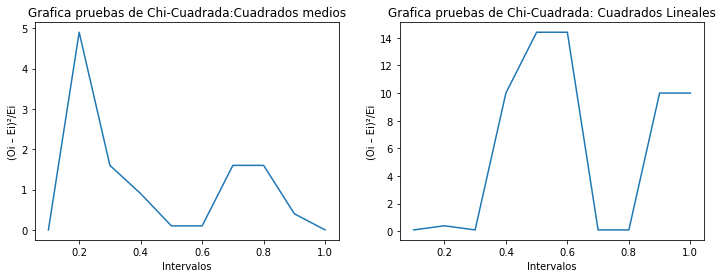

In [26]:
fig, axes = pp.subplots(1,2, figsize = (12,4))
axes[0].plot(intervalos,estadistico)
axes[0].set_title('Grafica pruebas de Chi-Cuadrada:Cuadrados medios')
axes[0].set_ylabel('(Oi – Ei)²/Ei')
axes[0].set_xlabel('Intervalos')
axes[1].plot(intervalos,estadistico2)
axes[1].set_title('Grafica pruebas de Chi-Cuadrada: Cuadrados Lineales')
axes[1].set_ylabel('(Oi – Ei)²/Ei')
axes[1].set_xlabel('Intervalos')
pp.show()

Referencias:

[1] : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6291769/ <br>
[2]: https://www.mdirector.com/marketing-automation/estrategias-de-marketing-automation-para-fidelizar.html<br>
[3]: https://blog.inconcertcc.com/automatiza-el-marketing-digital-en-tus-redes-sociales/<br>
